## Практическая работа по базовой математической статистике



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

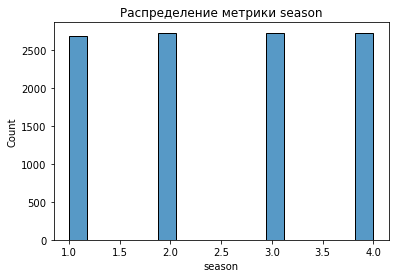

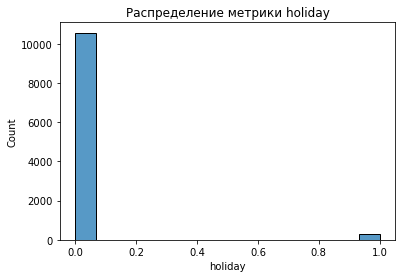

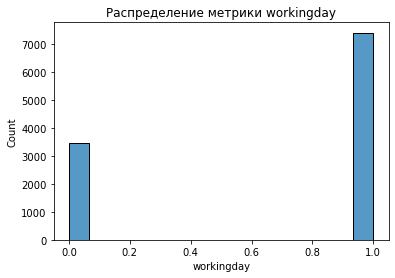

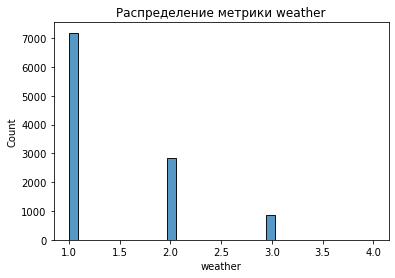

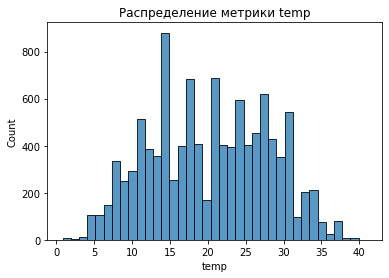

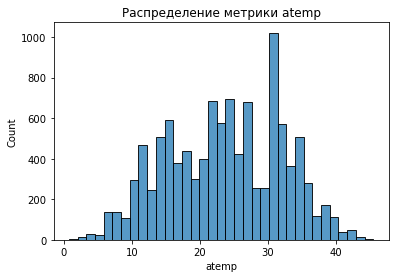

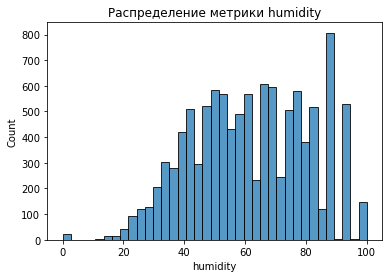

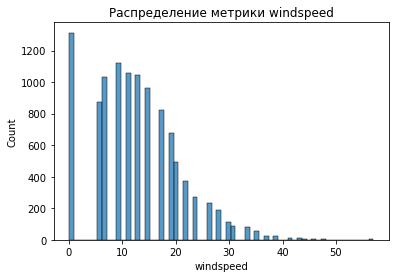

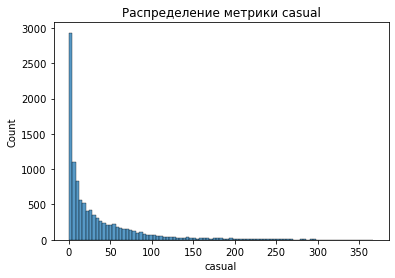

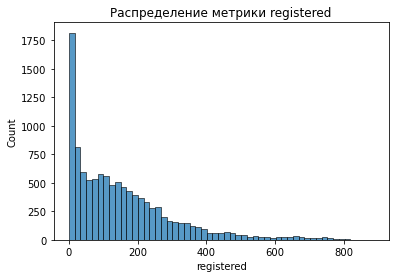

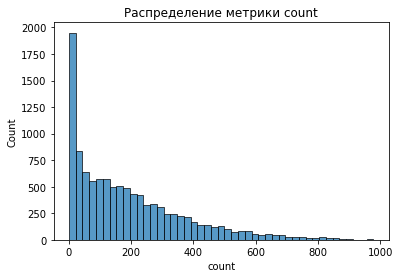

In [16]:
column_list = df.columns
for i in column_list:
    data = df[i].dropna()
    sns.histplot(data=data).set(title='Распределение метрики {}'.format(i))
    plt.show()

In [28]:
df['count_1'] = df['count']

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [20]:
for i in column_list:
    print('Метрики {}'.format(i))
    print('Среднее', df[i].mean())
    print('Дисперсия', df[i].std())
    print('50 перцентиль', df[i].quantile(q=0.5))
    print('75 перцентиль', df[i].quantile(q=0.75))
    print('99 перцентиль', df[i].quantile(q=0.99))
    print()

Метрики season
Среднее 2.5066139996325556
Дисперсия 1.1161743093442644
50 персентиль 3.0
75 персентиль 4.0
99 персентиль 4.0

Метрики holiday
Среднее 0.02856880396839978
Дисперсия 0.16659885062471985
50 персентиль 0.0
75 персентиль 0.0
99 персентиль 1.0

Метрики workingday
Среднее 0.6808745177291935
Дисперсия 0.4661591687997421
50 персентиль 1.0
75 персентиль 1.0
99 персентиль 1.0

Метрики weather
Среднее 1.418427337865148
Дисперсия 0.6338385858190921
50 персентиль 1.0
75 персентиль 2.0
99 персентиль 3.0

Метрики temp
Среднее 20.230859819952173
Дисперсия 7.791589843987506
50 персентиль 20.5
75 персентиль 26.24
99 персентиль 36.08

Метрики atemp
Среднее 23.65508405291192
Дисперсия 8.474600626484888
50 персентиль 24.24
75 персентиль 31.06
99 персентиль 40.15

Метрики humidity
Среднее 61.88645967297446
Дисперсия 19.245033277394786
50 персентиль 62.0
75 персентиль 77.0
99 персентиль 100.0

Метрики windspeed
Среднее 12.799395406945093
Дисперсия 8.16453732683849
50 персентиль 12.998
75 персе

В изучаемом датасете имеются аномалия в метриках windspeed, casual, registered, count. Метрики holiday, workingday, weather не распределены по нормальному закону.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [22]:
for i in column_list:
    print('Ассиметрия и эксцесс метрики {}'.format(i))
    print('Ассиметрия:')
    print(skew(df[i]))
    print('Эксцесс: ')
    print(kurtosis(df[i]))
    print()


Ассиметрия и эксцесс метрики season
Ассиметрия:
-0.007074695296526289
Эксцесс: 
-1.3555899543299803

Ассиметрия и эксцесс метрики holiday
Ассиметрия:
5.6597371332540805
Эксцесс: 
30.032624417535125

Ассиметрия и эксцесс метрики workingday
Ассиметрия:
-0.7760560687198784
Эксцесс: 
-1.3977369782030475

Ассиметрия и эксцесс метрики weather
Ассиметрия:
1.2433126730817885
Эксцесс: 
0.39480007841067577

Ассиметрия и эксцесс метрики temp
Ассиметрия:
0.0036903358354289715
Эксцесс: 
-0.9146613849825282

Ассиметрия и эксцесс метрики atemp
Ассиметрия:
-0.10254538108264065
Эксцесс: 
-0.8502363689497141

Ассиметрия и эксцесс метрики humidity
Ассиметрия:
-0.0863232869219358
Эксцесс: 
-0.760019710012902

Ассиметрия и эксцесс метрики windspeed
Ассиметрия:
0.5886853963635482
Эксцесс: 
0.629292367034056

Ассиметрия и эксцесс метрики casual
Ассиметрия:
2.495404491505502
Эксцесс: 
7.547610130561701

Ассиметрия и эксцесс метрики registered
Ассиметрия:
1.5245944734221468
Эксцесс: 
2.6243238654959855

Ассиме

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [29]:
def my_norm_confidence(df=df, column = 'count_1', alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [30]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


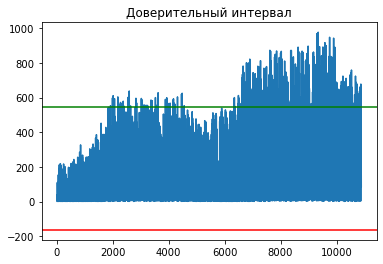

In [36]:
df.count_1.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")
plt.show()

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [37]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [42]:
anomaly_list = []
for i in column_list:
    anomaly = find_anomaly(df, i)
    print('Количество аномалий в метрике {}'.format(i))
    print(len(anomaly[0]))
    anomaly_list.append(len(anomaly[0]))

Количество аномалий в метрике season
2734
Количество аномалий в метрике holiday
0
Количество аномалий в метрике workingday
7412
Количество аномалий в метрике weather
859
Количество аномалий в метрике temp
117
Количество аномалий в метрике atemp
149
Количество аномалий в метрике humidity
148
Количество аномалий в метрике windspeed
80
Количество аномалий в метрике casual
183
Количество аномалий в метрике registered
125
Количество аномалий в метрике count
38


In [44]:
max(anomaly_list)

7412

Больше всего аномалий в метрике workingday

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [45]:
corr_m = df[column_list].corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


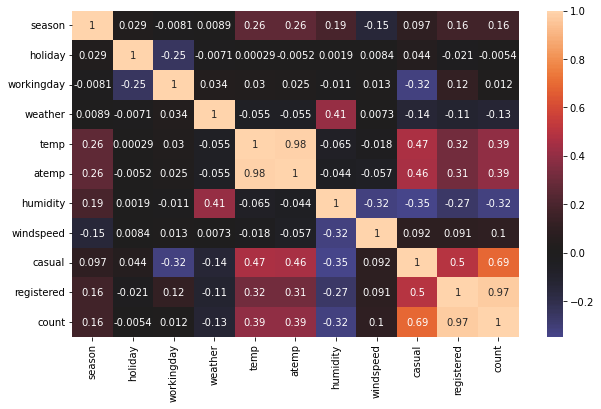

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_m, center=0, annot=True)
plt.show()

Прямая связь:

    Умеренная:
    humidity - weather
    casual - temp
    registered - temp
    count - temp
    casual - atemp
    registered - atemp
    count - atemp
    registered - casual
    
    Заметная:
    count - casual
    
    Весьма высокая:
    count - registered
    
Обратная связь:

    Умеренная:
    casual - workingday
    huminity - windspeed
    huminity - casual
    huminity - count